**1. Import des bibliothèques de base**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paramétrage pour une visualisation propre
sns.set(style="whitegrid")
%matplotlib inline


**2. Chargement du dataset**

In [3]:
fact = pd.read_csv("../data/star_schema/fact_weather.csv") 

# Aperçu rapide
fact.head()


,date_id,ville_id,source_id,temperature_2m_min,temperature_2m_max,temp_mean,precipitation_sum,humidity,pressure,wind_speed,rainy_day,id
0,1,1,1,15.9,25.2,20.55,0.0,66.79,1014.55,15.99,0,1
1,2,1,1,17.2,24.6,20.90,0.0,76.12,1017.65,12.31,0,2
2,3,1,1,16.1,26.1,21.10,0.0,68.04,1018.06,8.36,0,3
3,4,1,1,15.8,29.0,22.40,0.0,48.50,1014.89,12.48,0,4
4,5,1,1,19.5,27.3,23.40,4.5,65.29,1012.70,20.53,1,5


**3. Aperçu général du dataset**

In [4]:
fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date_id             14084 non-null  int64  
 1   ville_id            14084 non-null  int64  
 2   source_id           14084 non-null  int64  
 3   temperature_2m_min  14084 non-null  float64
 4   temperature_2m_max  14084 non-null  float64
 5   temp_mean           14084 non-null  float64
 6   precipitation_sum   14084 non-null  float64
 7   humidity            14084 non-null  float64
 8   pressure            14084 non-null  float64
 9   wind_speed          14084 non-null  float64
 10  rainy_day           14084 non-null  int64  
 11  id                  14084 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 1.3 MB


In [5]:
fact.describe()

,date_id,ville_id,source_id,temperature_2m_min,temperature_2m_max,temp_mean,precipitation_sum,humidity,pressure,wind_speed,rainy_day,id
count,14084.00000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,1006.50000,4.000000,1.000497,12.311549,20.196069,16.253809,3.091171,72.712987,1014.703101,15.530060,0.534649,7042.500000
std,580.83492,2.000071,0.022289,9.548741,10.147466,9.662279,7.846022,12.746861,8.331754,8.777498,0.498816,4065.844931
min,1.00000,1.000000,1.000000,-30.900000,-25.100000,-27.350000,0.000000,13.830000,966.180000,1.650000,0.000000,1.000000
25%,503.75000,2.000000,1.000000,6.200000,13.700000,10.100000,0.000000,64.670000,1010.077500,9.830000,0.000000,3521.750000
50%,1006.50000,4.000000,1.000000,13.300000,21.400000,17.400000,0.100000,74.170000,1015.290000,13.140000,1.000000,7042.500000
75%,1509.25000,6.000000,1.000000,18.400000,26.600000,22.300000,2.300000,82.210000,1019.940000,18.390000,1.000000,10563.250000
max,2012.00000,7.000000,2.000000,39.020000,46.200000,39.650000,183.800000,99.210000,1052.390000,65.480000,1.000000,14084.000000


**4. Vérification des types de colonnes et des valeurs uniques**

In [6]:
# types
fact.dtypes

date_id                 int64
ville_id                int64
source_id               int64
temperature_2m_min    float64
temperature_2m_max    float64
temp_mean             float64
precipitation_sum     float64
humidity              float64
pressure              float64
wind_speed            float64
rainy_day               int64
id                      int64
dtype: object

**5. Détection de données manquantes et doublons**

In [7]:
print("Valeurs manquantes par colonne :\n", fact.isnull().sum())
print("Nombre de doublons :", fact.duplicated().sum())

Valeurs manquantes par colonne :
 date_id               0
ville_id              0
source_id             0
temperature_2m_min    0
temperature_2m_max    0
temp_mean             0
precipitation_sum     0
humidity              0
pressure              0
wind_speed            0
rainy_day             0
id                    0
dtype: int64
Nombre de doublons : 0


**6. Visualisation de la température moyenne par ville**

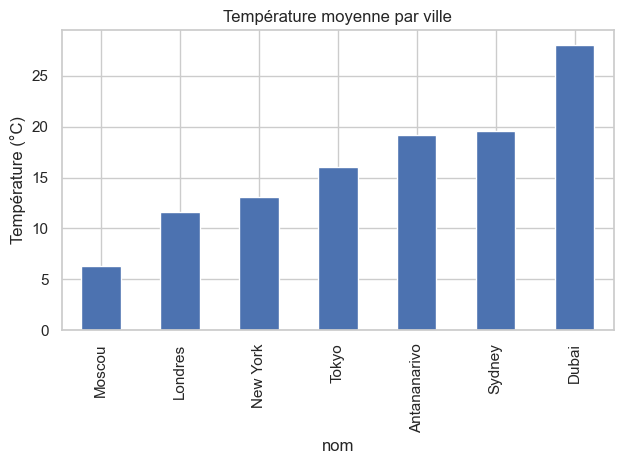

In [9]:
dim_ville = pd.read_csv("../data/star_schema/dim_ville.csv")
df = fact.merge(dim_ville, on="ville_id")

# Moyenne par ville
df.groupby("nom")["temp_mean"].mean().sort_values().plot(kind="bar", title="Température moyenne par ville", ylabel="Température (°C)")
plt.tight_layout()
plt.show()


**7. Évolution temporelle de la température**

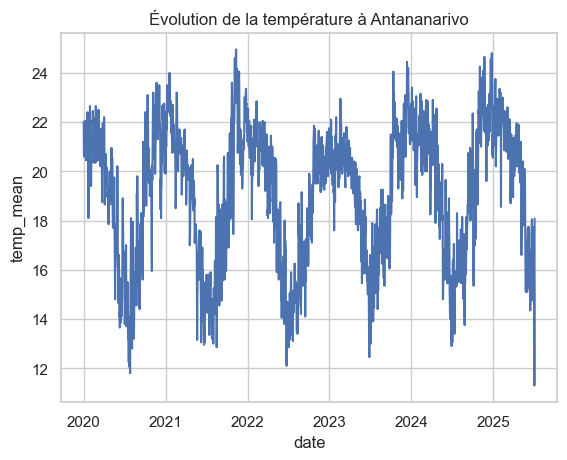

In [10]:
dim_date = pd.read_csv("../data/star_schema/dim_date.csv")

df = df.merge(
    dim_date[["date_id", "time"]].rename(columns={"time": "date"}),
    on="date_id"
)

df["date"] = pd.to_datetime(df["date"])

# Ligne pour une ville
tana = df[df["nom"] == "Antananarivo"]
sns.lineplot(x="date", y="temp_mean", data=tana)
plt.title("Évolution de la température à Antananarivo")
plt.show()


**8. Corrélation entre les variables météorologiques**

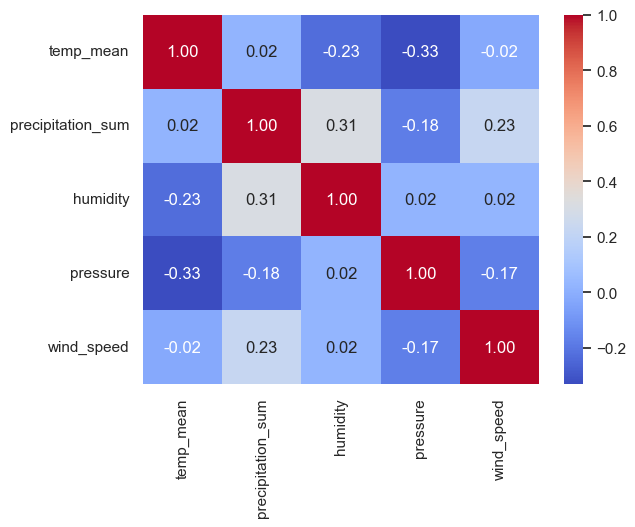

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables à analyser
variables_meteo = [
    "temp_mean",
    "precipitation_sum",
    "humidity",
    "pressure",
    "wind_speed"
]

# Calcul de la matrice de corrélation
correlation_matrix = fact[variables_meteo].corr()

# Affichage de la heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


**9. Temperature moyenne de chaque ville avec Écart-type**

In [14]:
df.groupby("nom")["temp_mean"].agg(["mean", "std"]).sort_values(by="std")

,mean,std
nom,,
Antananarivo,19.132520,2.749346
Sydney,19.575348,5.047693
Londres,11.612490,5.536896
Dubai,28.035318,5.924338
Tokyo,16.012619,8.469155
New York,13.068106,9.235362
Moscou,6.340258,10.473316


**10. Nombre de jours pluvieux**

In [15]:

fact = pd.read_csv("../data/star_schema/fact_weather.csv")
dim_ville = pd.read_csv("../data/star_schema/dim_ville.csv")
dim_date = pd.read_csv("../data/star_schema/dim_date.csv")

df = fact.merge(dim_ville, on="ville_id").merge(dim_date.rename(columns={"time": "date"}), on="date_id")

df["jour_pluvieux"] = df["precipitation_sum"] > 0

jours_pluvieux_par_ville = df.groupby("nom")["jour_pluvieux"].sum().reset_index()
jours_pluvieux_par_ville.columns = ["ville", "nombre_jours_pluvieux"]

print("Nombre de jours pluvieux par ville :")
print(jours_pluvieux_par_ville)



Nombre de jours pluvieux par ville :
          ville  nombre_jours_pluvieux
0  Antananarivo                   1159
1         Dubai                    132
2       Londres                   1212
3        Moscou                   1252
4      New York                   1035
5        Sydney                   1623
6         Tokyo                   1117
